# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: IAD25
Członkowie: Karolina Minor, Filip Przyczyna, Maciej Zabdyr, Maria Zalewska

---

## Zestaw zadań 3: Elementy statystyki opisowej 3 (Notatnik 2/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib.lines import Line2D

### Wczytanie danych
Poniższy kod wczytuje do zmiennych `bike_traffic_data` oraz `weather_data` dane z przygotowanych wcześniej plików bike_traffic_data.pkl i weather_data.pkl.

In [3]:
# Ruch rowerowy
bike_traffic_data = pd.read_pickle("bike_traffic_data.pkl")
bike_traffic_data

,Total,East,West
Date,,,
2022-01-01 00:00,0.0,0.0,0.0
2022-01-01 01:00,0.0,0.0,0.0
2022-01-01 02:00,1.0,0.0,1.0
2022-01-01 03:00,0.0,0.0,0.0
2022-01-01 04:00,0.0,0.0,0.0
...,...,...,...
2022-12-31 19:00,14.0,6.0,8.0
2022-12-31 20:00,20.0,13.0,7.0
2022-12-31 21:00,16.0,6.0,10.0


In [4]:
# Pogoda
weather_data = pd.read_pickle("weather_data.pkl")
weather_data

Temperature                      Precipitation Snow        \
                   Min       Avg        Max         Total Fall Depth   
Date                                                                   
2022-01-01   -5.555556 -2.222222   1.111111         0.000  0.0  76.2   
2022-01-02   -1.111111  2.777778   6.111111        20.066  0.0  76.2   
2022-01-03    0.555556  2.777778   5.000000        12.446  0.0   0.0   
2022-01-04    1.666667  3.888889   5.555556         5.588  0.0   0.0   
2022-01-05    1.111111  2.777778   3.888889         8.382  0.0   0.0   
...                ...       ...        ...           ...  ...   ...   
2022-12-27    6.666667  9.444444  11.666667         6.858  0.0   0.0   
2022-12-28    5.000000  6.666667   7.777778         0.762  0.0   0.0   
2022-12-29    5.000000  6.666667   7.777778         8.890  0.0   0.0   
2022-12-30    5.555556  8.888889  11.666667         9.144  0.0   0.0   
2022-12-31    6.111111  7.777778   9.444444         0.254  0.0   0.0   

                Wind                    Sky  
           Avg speed  Max speed Cloud cover  
Date                                         
2022-01-01  3.576311   5.364467         0.8  
2022-01-02  3.799831   8.940778         1.0  
2022-01-03  5.140947  11.623011         0.9  
2022-01-04  4.336277   9.834856         0.9  
2022-01-05  2.235194   4.470389         1.0  
...              ...        ...         ...  
2022-12-27  7.733773  16.540439         1.0  
2022-12-28  5.766802  12.517089         0.8  
2022-12-29  2.771641   7.599661         1.0  
2022-12-30  6.437360  11.623011         0.9  
2022-12-31  4.470389   9.387817         0.9  

[365 rows x 9 columns]

### Zadnie 2: Przegląd danych - ruch rowerowy [15 pkt]

#### a) Tabele

Przygotuj trzy tablice prezentujące różne aspekty ruchu rowerowego według poniższych wytycznych.

Tablica `daily_bike_traffic_data` prezentuje sumaryczną liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach roku w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu.
> Indeks: Date</br>
> PeriodIndex zawierający okresy czasu, w których dokonywane były zliczenia rowerzystów.</br>

> Kolumny: Total, East, West</br>
> Kolumny zawierają liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach roku w sumie oraz wraz z podziałem na zachodnią i wschodnią stronę mostu.
       
Tablica `bike_traffic_by_weekday_data` prezentuje średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach tygodnia w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu.

> Indeks: Day</br>
> Dni tygodnia (Monday, Tuesday ... ).</br>

> Kolumny: Total, East, West</br>
> Kolumny zawierają średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach tygodnia w sumie oraz wraz z podziałem na zachodnią i wschodnią stronę mostu.
    
Tablica `weekday_weekend_hourly_bike_traffic_data`  prezentuje średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu, a także z podziałem na dni robocze i weekend.

> Indeks: Hour </br>
> Godziny, dla których liczone są wartości średnie (0, 1, 2 ...).

> Kolumny: </br>
> 1 rzędu: Weekday, Weekend</br>
> 2 rzędu: Total, East, West (ten sam zestaw kolumn dla każdego okresu tygodnia)</br>
> Kolumny zawierają średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w sumie oraz wraz z podziałem na zachodnią i wschodnią stronę mostu.

Zapisz tablicę `daily_bike_traffic_data` do pliku daily_bike_traffic_data.pkl.

Wyświetl przygotowane tablice w taki sposób aby zawarte w nich liczby rowerzystów wyświetlały się z dokładnością 0 miejsc po przecinku, a średnie liczby rowerzystów z dokładnością 2 miejsc po przecinku. W przypadku tablicy `daily_bike_traffic_data` wyświetl tylko 10 pierwszych wierszy tablicy.

In [5]:
daily_bike_traffic_data = bike_traffic_data.copy()
daily_bike_traffic_data = daily_bike_traffic_data.resample( 'D' ).sum()
daily_bike_traffic_data.to_pickle( 'daily_bike_traffic_data.pkl' )

print( daily_bike_traffic_data.head(10).astype( int ) )

            Total  East  West
Date                         
2022-01-01     33    23    10
2022-01-02     37    20    17
2022-01-03    253    93   160
2022-01-04    577   220   357
2022-01-05    713   261   452
2022-01-06    588   231   357
2022-01-07    650   250   400
2022-01-08   1147   548   599
2022-01-09   1923   912  1011
2022-01-10    875   345   530


/tmp/ipykernel_6065/2930188540.py:2: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  daily_bike_traffic_data = daily_bike_traffic_data.resample( 'D' ).sum()


In [6]:
### Komórka testowa

# Test 1 Kształt tablicy
assert daily_bike_traffic_data.shape == (365, 3)
# Test 2 Kolumny
assert len(set(list(daily_bike_traffic_data.columns)) & set(['Total', 'East', 'West'])) == 3
# Test 3 Indeks
assert (daily_bike_traffic_data.index.name == 'Date') == True
assert isinstance(daily_bike_traffic_data.index, pd.PeriodIndex)
assert daily_bike_traffic_data.index.values.min() == pd.Period('2022-01-01', 'D')
assert daily_bike_traffic_data.index.values.max() == pd.Period('2022-12-31', 'D')
# Test 4 Zawartość kolumn
assert np.all(np.isclose(daily_bike_traffic_data[['Total', 'East', 'West']].min().values, np.array([23., 12., 10.]))) == True
assert np.all(np.isclose(daily_bike_traffic_data[['Total', 'East', 'West']].max().values, np.array([4233., 1733., 3031.]))) == True

In [7]:
# Agregacja danych z poszczególnych dni tygodnia
# YOUR CODE HERE
# Tablica bike_traffic_by_weekday_data
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bike_traffic_by_weekday_data = daily_bike_traffic_data.groupby(daily_bike_traffic_data.index.to_timestamp().day_name()).mean()
bike_traffic_by_weekday_data = bike_traffic_by_weekday_data.reindex(weekday_names)
bike_traffic_by_weekday_data.index.name = 'Day'
bike_traffic_by_weekday_data

,Total,East,West
Day,,,
Monday,2093.153846,820.807692,1272.346154
Tuesday,2579.961538,983.826923,1596.134615
Wednesday,2538.461538,971.576923,1566.884615
Thursday,2406.711538,926.596154,1480.115385
Friday,2087.442308,843.538462,1243.903846
Saturday,1929.962264,843.924528,1086.037736
Sunday,1664.442308,771.576923,892.865385


In [8]:
### Komórka testowa

# Test 1 Kształt tablicy
assert bike_traffic_by_weekday_data.shape == (7, 3)
# Test 2 Kolumny
assert len(set(list(bike_traffic_by_weekday_data.columns)) & set(['Total', 'East', 'West'])) == 3
# Test 3 Indeks
assert (bike_traffic_by_weekday_data.index.name == 'Day') == True
assert len(set(list(bike_traffic_by_weekday_data.index)) & set(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])) == 7
# Test 4 Zawartość kolumn
assert np.all(np.isclose(bike_traffic_by_weekday_data.min().values, np.array([1664.44230769,  771.57692308,  892.86538462]))) == True
assert np.all(np.isclose(bike_traffic_by_weekday_data.max().values, np.array([2579.96153846,  983.82692308, 1596.13461538]))) == True

In [9]:
w = bike_traffic_data.groupby([bike_traffic_data.index.weekday < 5, bike_traffic_data.index.hour]).mean()
w1 = w.loc[False]
w2 = w.loc[True]
w3 = pd.concat( [ w2, w1 ], axis = 1 )
# w3 = w3.drop( 'weekday', axis = 1 )
w3.index.name = 'Hour'
w3.columns = pd.MultiIndex.from_tuples([('Weekday', 'Total'), ('Weekday', 'East'), ('Weekday', 'West'), ('Weekend', 'Total'), ('Weekend', 'East'), ('Weekend', 'West')])
weekday_weekend_hourly_bike_traffic_data = w3

print( weekday_weekend_hourly_bike_traffic_data )

         Weekday                            Weekend                      
           Total       East        West       Total       East       West
Hour                                                                     
0       6.565385   2.526923    4.038462   14.647619   6.190476   8.457143
1       3.069231   1.238462    1.830769    8.714286   3.295238   5.419048
2       1.992308   0.934615    1.057692    5.336538   2.298077   3.038462
3       1.750000   0.873077    0.876923    2.828571   1.295238   1.533333
4       6.892308   2.457692    4.434615    3.342857   1.076190   2.266667
5      19.973077   7.392308   12.580769    5.361905   1.990476   3.371429
6      70.692308  29.957692   40.734615   16.304762   6.209524  10.095238
7     167.507692  72.511538   94.996154   27.571429  11.276190  16.295238
8     236.534615  99.019231  137.515385   57.057143  24.933333  32.123810
9     148.876923  56.846154   92.030769   83.647619  37.285714  46.361905
10     88.153846  36.065385   52.08846

In [10]:
### Komórka testowa

# Test 1 Kształt tablicy
assert weekday_weekend_hourly_bike_traffic_data.shape == (24, 6)
# Test 2 Kolumny
assert len(set(list(weekday_weekend_hourly_bike_traffic_data.columns)) & set(list(weekday_weekend_hourly_bike_traffic_data.columns))) == 6
# Test 3 Indeks
assert (weekday_weekend_hourly_bike_traffic_data.index.name == 'Hour') == True
assert weekday_weekend_hourly_bike_traffic_data.index.values.min() == 0
assert weekday_weekend_hourly_bike_traffic_data.index.values.max() == 23
# Test 4 Zawartość kolumn
assert np.all(np.isclose(weekday_weekend_hourly_bike_traffic_data.min().values, np.array([1.75, 0.87307692, 0.87692308, 2.82857143, 1.07619048, 1.53333333]))) == True
assert np.all(np.isclose(weekday_weekend_hourly_bike_traffic_data.max().values, np.array([324.42307692, 99.01923077, 225.72307692, 187.73333333, 87.79047619, 99.94285714]))) == True

#### b) Wykresy

Zwizualizuj dane z tablic `daily_bike_traffic_data`, `bike_traffic_by_weekday_data` oraz `weekday_weekend_hourly_bike_traffic_data` za pomocą wykresów liniowych. Przygotuj:
- wykres prezentujący liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach roku w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu,
- wykres prezentujący średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach tygodnia w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu,
- wykres prezentujący średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w dni robocze w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu,
- wykres prezentujący średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w weekendy w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu.

Zestaw wykresy na pojedynczej figurze (siatka wykresów 2x3, przy czym wykres sum dziennych zajmuje wszystkie trzy pola w górnym wierszu figury). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory wykresów poszczególnych parametrów (każdy z parametrów ma na wszystkich wykresach ten sam kolor),
- dodaj do figury pojedynczą legendę zawierającą nazwy zwizualizowanych parametrów i zlokalizowaną w dolnej części figury, pod wykresami,
- dopasuj zakresy osi wykresów do zakresu wartości danych.

Text(0.5, 0.98, 'Cyclists on the Fremont Bridge in Seattle')

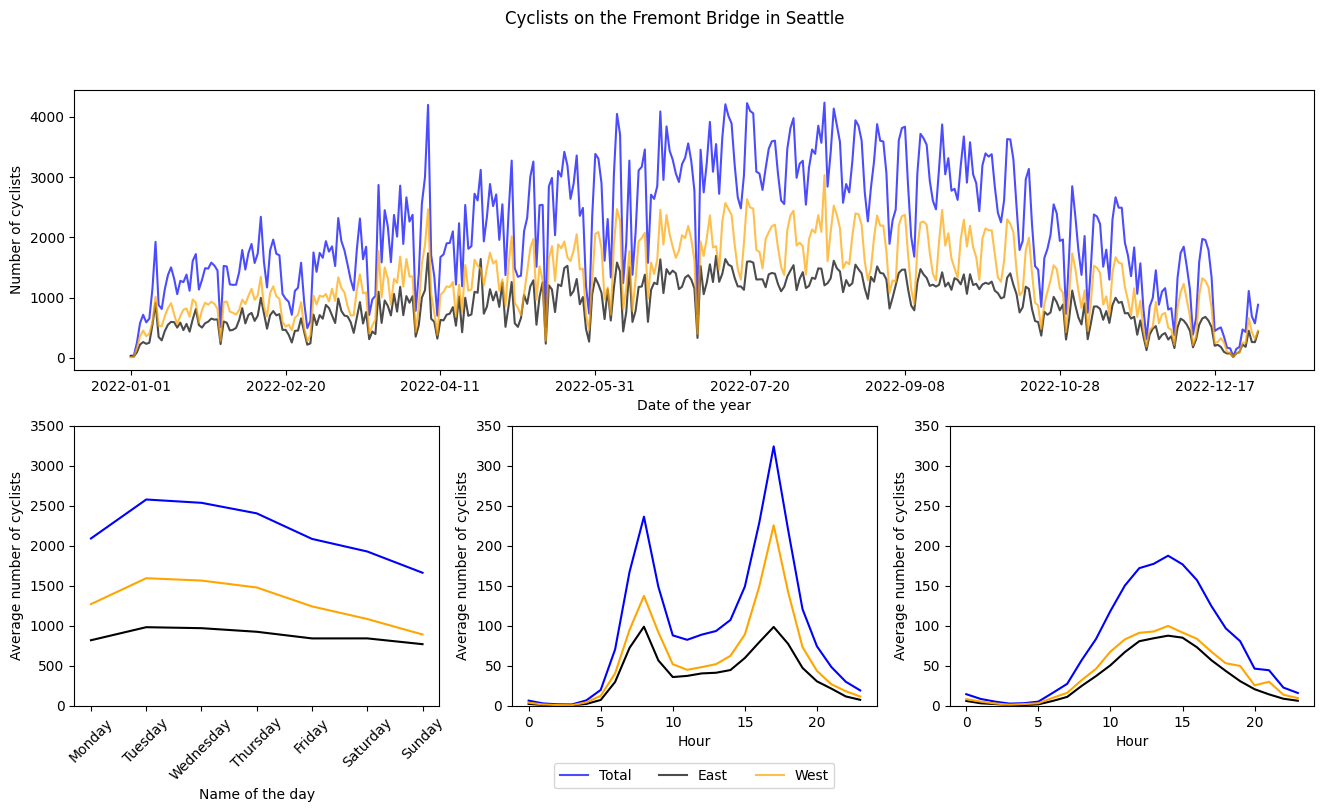

In [11]:
# YOUR CODE HERE
fig, axs = plt.subplots(2,3, figsize=(16,8))
chart = axs[0, 0].get_gridspec()
for ax in axs[0, 0:]:
    ax.remove()
ax_higher = fig.add_subplot(chart[0, 0:])

ax_higher.plot(daily_bike_traffic_data.index.astype(str) ,daily_bike_traffic_data['Total'], c='Blue', label="Total", alpha=0.7)
ax_higher.plot(daily_bike_traffic_data.index.astype(str),daily_bike_traffic_data['East'], color='black', label="East", alpha=0.7)
ax_higher.plot(daily_bike_traffic_data.index.astype(str),daily_bike_traffic_data['West'], color='orange', label = "West", alpha=0.7)

ax_higher.xaxis.set_major_locator(mpl.ticker.AutoLocator())


leg = ax_higher.legend(loc='center', bbox_to_anchor=(0.5, -1.45), shadow=False, ncols=3)

axs[1,0].plot(bike_traffic_by_weekday_data.index.astype(str), bike_traffic_by_weekday_data['Total'], c='Blue')
axs[1,0].plot(bike_traffic_by_weekday_data.index.astype(str), bike_traffic_by_weekday_data['East'], c='black')
axs[1,0].plot(bike_traffic_by_weekday_data.index.astype(str), bike_traffic_by_weekday_data['West'], c='orange')
axs[1,0].tick_params(axis='x', labelrotation=45)

axs[1,1].plot(weekday_weekend_hourly_bike_traffic_data[('Weekday', 'Total')], c='Blue')
axs[1,1].plot(weekday_weekend_hourly_bike_traffic_data[('Weekday', 'East')], c='black')
axs[1,1].plot(weekday_weekend_hourly_bike_traffic_data[('Weekday', 'West')], c='orange')

axs[1,2].plot(weekday_weekend_hourly_bike_traffic_data[('Weekend', 'Total')], c='Blue')
axs[1,2].plot(weekday_weekend_hourly_bike_traffic_data[('Weekend', 'East')], c='black')
axs[1,2].plot(weekday_weekend_hourly_bike_traffic_data[('Weekend', 'West')], c='orange')

axs[1,0].set_ylim([0,3500])
axs[1,1].set_ylim([0,350])
axs[1,2].set_ylim([0,350])

ax_higher.set_xlabel('Date of the year')
ax_higher.set_ylabel('Number of cyclists')

axs[1,0].set_ylabel('Average number of cyclists')
axs[1,1].set_ylabel('Average number of cyclists')
axs[1,2].set_ylabel('Average number of cyclists')

axs[1,0].set_xlabel('Name of the day')
axs[1,1].set_xlabel('Hour')
axs[1,2].set_xlabel('Hour')

fig.suptitle('Cyclists on the Fremont Bridge in Seattle')

### Zadnie 3: Przegląd danych - pogoda [15 pkt]

#### a) Tabela

Przygotuj tablicę `monthly_weather_data` zawierającą dane z tablicy `weather_data` zagregowane w obrębie poszczególnych miesięcy według następującego klucza:
- wartość minimalna z całego miesiąca: Temperature: Min,
- wartość maksymalna z całego miesiąca: Temperature: Max, Wind: Max speed,
- suma z całego miesiąca: Precipitation: Total, Snow: Fall,
- średnia z całego miesiąca: Temperature: Avg, Snow: Depth, Wind: Avg speed, Sky: Cloud cover.

Tablica powinna zawierać wyłącznie następujące elementy:</br>
> Indeks: Date</br>
> PeriodIndex zawierający okresy czasu, których dotyczą dane z raportów pogodowych.</br>

> Kolumny: W podanej niżej kolejności</br>
> Temperature: Min, Avg, Max</br>
> Precipitation: Total</br>
> Snow: Fall, Depth</br>
> Wind: Avg speed, Max speed</br>
> Sky: Cloud cover</br>
> (Nazwa 1 poziomu: podległe jej nazwy 2 poziomu)

Wyświetl przygotowaną tablicę w taki sposób aby zawarte w nich wartości wyświetlały się z dokładnością 2 miejsc po przecinku.

In [12]:
monthly_weather_data = weather_data.resample( 'M' ).agg({
    ('Temperature', 'Min'): 'min',
    ('Temperature', 'Avg'): 'mean',
    ('Temperature', 'Max'): 'max',
    ('Precipitation', 'Total'): 'sum',
    ('Snow', 'Fall'): 'sum',
    ('Snow', 'Depth'): 'mean',
    ('Wind', 'Avg speed'): 'mean',
    ('Wind', 'Max speed'): 'max',
    ('Sky', 'Cloud cover'): 'mean'
})

print( monthly_weather_data )
print( monthly_weather_data.min().values )
print( monthly_weather_data.max().values )

        Temperature                       Precipitation    Snow            \
                Min        Avg        Max         Total    Fall     Depth   
Date                                                                        
2022-01   -5.555556   5.125448  13.333333       179.324    0.00  4.916129   
2022-02   -5.000000   5.773810  13.888889       135.128    0.00  0.000000   
2022-03   -1.666667   8.440860  17.222222        84.328    0.00  0.000000   
2022-04    0.000000   8.518519  22.777778        68.834    0.00  0.000000   
2022-05    4.444444  11.612903  21.666667        97.028    0.00  0.000000   
2022-06    8.888889  16.314815  32.777778        67.818    0.00  0.000000   
2022-07   10.555556  20.804598  35.000000         4.572    0.00  0.000000   
2022-08   11.666667  21.272401  32.777778         1.270    0.00  0.000000   
2022-09    9.444444  18.370370  33.333333         6.350    0.00  0.000000   
2022-10    5.000000  14.390681  31.111111        63.754    0.00  0.000000   

/tmp/ipykernel_6065/1317377959.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  monthly_weather_data = weather_data.resample( 'M' ).agg({


In [13]:
### Komórka testowa
# Test 1 Kształt tablicy
assert monthly_weather_data.shape == (12, 9)
# Test 2 Kolumny
assert len(set(list(monthly_weather_data.columns)) & set([('Temperature', 'Min'), ('Temperature', 'Avg'), ('Temperature', 'Max'), ('Precipitation', 'Total'),
            ('Snow', 'Fall'), ('Snow', 'Depth'), ('Wind', 'Avg speed'), ('Wind', 'Max speed'), ('Sky', 'Cloud cover')])) == 9
# Test 3 Indeks
assert (monthly_weather_data.index.name == 'Date') == True
assert isinstance(monthly_weather_data.index, pd.PeriodIndex) == True
assert monthly_weather_data.index.values.min() == pd.Period('2022-01', 'M')
assert monthly_weather_data.index.values.max() == pd.Period('2022-12', 'M')
# Test 4 Zawartość kolumn
assert np.all(np.isclose(monthly_weather_data.min().values, np.array([-7.77777778, 3.90681004, 13.33333333, 1.27, 0., 0., 2.93603606, 8.0467, 0.43870968]))) == True
assert np.all(np.isclose(monthly_weather_data.max().values, np.array([11.66666667, 21.27240143, 35., 191.77, 119.38, 5.08, 3.97864611, 16.54043889, 0.86774194]))) == True

#### b) Wykresy

Zwizualizuj dane z tablicy `weather_data` za pomocą następującego zestawu wykresów:
- temperatura dzienna (minimalna, średnia i maksymalna), wypełnij kolorem przestrzeń między temperaturą minimalną i maksymalną,
- dzienne zachmurzenie (lewa oś wykresu) i opady (prawa oś wykresu), wypełnij kolorem przestrzeń pod każdym z wykresów,
- dzienna średnia i maksymalna prędkość wiatru.

Zestaw wykresy na pojedynczej figurze (siatka wykresów 3x1). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory wykresów poszczególnych parametrów,
- dodaj do figury pojedynczą legendę zawierającą nazwy wizualizowanych parametrów i zlokalizowaną w dolnej części figury, pod wykresami, uwzględnij w legendzie nie tylko kolory linii, ale również zastosowanych wypełnień,
- dopasuj zakresy osi wykresów do zakresu danych, w szczególności dobierz skale osi Y tak, aby wykresy opadów i zachmurzenia nie przysłaniały się wzajemnie,
- w opisach osi Y umieść jednostki, w których wyrażone są wartości widoczne na wykresach.

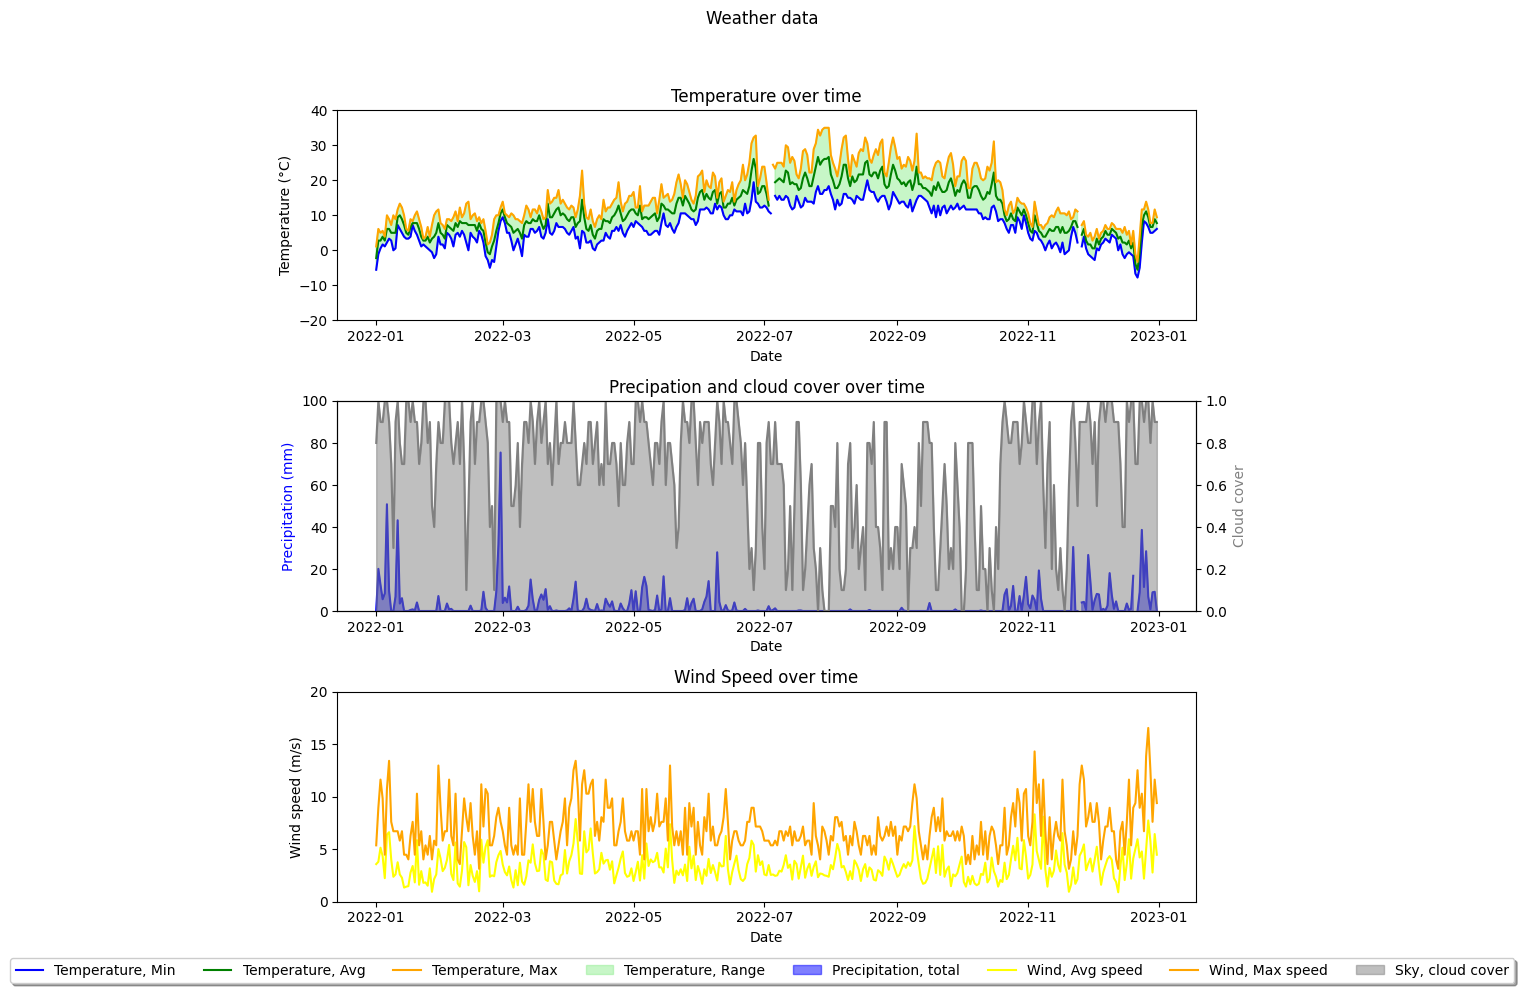

In [14]:
weather_data = weather_data.to_timestamp()

colors = {
    'Temperature': {
        'Min': 'blue',
        'Avg': 'green',
        'Max': 'orange'
    },
    'Precipitation': {
        'Total': 'blue'
    },
    'Sky': {
        'Cloud cover': 'gray'
    },
    'Wind': {
        'Avg speed': 'yellow',
        'Max speed': 'orange'
    }
}

fig, axs = plt.subplots( 3, 1, figsize=(10, 10))
plt.suptitle( 'Weather data' )

for col in ['Min', 'Avg', 'Max']:
    axs[0].plot( weather_data.index, weather_data[ 'Temperature', col ], color = colors[ 'Temperature' ][ col ], label = 'Temperature, '+col )
axs[0].fill_between( weather_data.index, weather_data[ 'Temperature', 'Min' ], weather_data[ 'Temperature', 'Max' ], 
                    color = 'lightgreen', alpha = 0.5, label = 'Temperature, Range' )
axs[0].set_ylabel( 'Temperature (°C)' )
#axs[0].legend( loc = 'lower left' )
axs[0].set_ylim( -20, 40 )

axs[1].plot(weather_data.index, weather_data[ 'Precipitation', 'Total' ], color = colors[ 'Precipitation' ][ 'Total' ] )
axs[1].fill_between( weather_data.index, weather_data[ 'Precipitation', 'Total' ], 0, color = 'blue', alpha = 0.5, label = 'Precipitation, total' )
axs[1].set_ylabel( 'Precipitation (mm)', color = colors[ 'Precipitation' ][ 'Total' ] )
axs[1].set_ylim(0, 100)
axs[1].set_xlabel( 'Precipitation (mm)' )

axs_twinx = axs[1].twinx()
axs_twinx.plot( weather_data.index, weather_data[ 'Sky', 'Cloud cover' ], color = colors[ 'Sky' ][ 'Cloud cover' ] )
axs_twinx.fill_between( weather_data.index, weather_data[ 'Sky', 'Cloud cover' ], 0, color = 'gray', alpha = 0.5, label = 'Sky, cloud cover' )
axs_twinx.set_ylabel( 'Cloud cover', color = colors[ 'Sky' ][ 'Cloud cover' ] )
axs_twinx.set_ylim( 0, 1 )
axs_twinx.set_xlabel( 'Cloud cover' )

axs[2].plot( weather_data.index, weather_data[ 'Wind', 'Avg speed' ], color = colors[ 'Wind' ][ 'Avg speed' ], label = 'Wind, Avg speed' )
axs[2].plot( weather_data.index, weather_data[ 'Wind', 'Max speed' ], color = colors[ 'Wind' ][ 'Max speed' ], label = 'Wind, Max speed' )
axs[2].set_ylabel( 'Wind speed (m/s)' )
axs[2].set_ylim( 0, 20 )
    
axs[0].set_title( 'Temperature over time' )
axs[0].set_xlabel( 'Date' )
axs[1].set_title( 'Precipation and cloud cover over time' )
axs[1].set_xlabel( 'Date' )
axs[2].set_title( 'Wind Speed over time' )
axs[2].set_xlabel( 'Date' )
        
fig.legend( loc = 'lower center', bbox_to_anchor = ( 0.5, 0 ), fancybox = True, shadow = True, ncol = 8 )
plt.tight_layout( rect = [ 0, 0.03, 1, 0.95 ] )
plt.show()